# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
!pip install citipy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import date

from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
# cities

626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
import json

url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial"

cities_final = pd.DataFrame(columns=["City","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed","Country","Date"])

print('-'*30)
print("Beginning Data Retrieval")
print('-'*30)

i=0
j=0

for city in cities:

    response = requests.get(f"{url}&q={city}")
#     print(response)
    if (response.status_code == 200):

        print(f"Processing Record {j} of Set {i+1} | {city}")
        j+=1

        if(j==50):
            i+=1
            j=0

        json_response = response.json()

        cities_final = cities_final.append({
                            "City":city,
                            "Lat":json_response['coord']['lat'],
                            "Lng":json_response['coord']['lon'],
                            "Max Temp":json_response['main']['temp_max'],
                            "Humidity":json_response['main']['humidity'],
                            "Cloudiness":json_response['clouds']['all'],
                            "Wind Speed":json_response['wind']['speed'],
                            "Country":json_response['sys']['country'],
                            "Date":json_response['dt']},ignore_index=True)
    else:
        print(f"City not found. Skipping...{city}")
        
print('-'*30)
print("Data Retrieval Complete")
print('-'*30)


------------------------------
Beginning Data Retrieval
------------------------------
Processing Record 0 of Set 1 | chuy
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | lebu
City not found. Skipping...grand river south east
City not found. Skipping...illoqqortoormiut
Processing Record 3 of Set 1 | tymovskoye
Processing Record 4 of Set 1 | kinshasa
Processing Record 5 of Set 1 | suruc
Processing Record 6 of Set 1 | teguldet
Processing Record 7 of Set 1 | new norfolk
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | san cristobal
Processing Record 10 of Set 1 | ciudad bolivar
Processing Record 11 of Set 1 | san quintin
City not found. Skipping...sulurpeta
Processing Record 12 of Set 1 | hobart
Processing Record 13 of Set 1 | puerto ayora
Processing Record 14 of Set 1 | goderich
Processing Record 15 of Set 1 | bacong
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | hilo
Processing Record 18 of Set 1 | meulaboh
Processing Re

Processing Record 28 of Set 4 | ilulissat
Processing Record 29 of Set 4 | ust-ilimsk
Processing Record 30 of Set 4 | tarauaca
Processing Record 31 of Set 4 | la ligua
Processing Record 32 of Set 4 | yaan
Processing Record 33 of Set 4 | teguise
Processing Record 34 of Set 4 | djambala
Processing Record 35 of Set 4 | lompoc
Processing Record 36 of Set 4 | ingham
Processing Record 37 of Set 4 | la libertad
Processing Record 38 of Set 4 | dubrovka
City not found. Skipping...viligili
Processing Record 39 of Set 4 | guerrero negro
Processing Record 40 of Set 4 | paso de carrasco
Processing Record 41 of Set 4 | ulaangom
Processing Record 42 of Set 4 | thessalon
Processing Record 43 of Set 4 | sitka
Processing Record 44 of Set 4 | carnarvon
Processing Record 45 of Set 4 | coahuayana
Processing Record 46 of Set 4 | cedar city
Processing Record 47 of Set 4 | great falls
Processing Record 48 of Set 4 | ishigaki
City not found. Skipping...haibowan
Processing Record 49 of Set 4 | ahipara
Processing

Processing Record 17 of Set 8 | guadalajara
Processing Record 18 of Set 8 | bathurst
Processing Record 19 of Set 8 | fowa
Processing Record 20 of Set 8 | yakeshi
Processing Record 21 of Set 8 | ballina
Processing Record 22 of Set 8 | haines junction
Processing Record 23 of Set 8 | road town
City not found. Skipping...palabuhanratu
Processing Record 24 of Set 8 | san ramon
Processing Record 25 of Set 8 | ilheus
Processing Record 26 of Set 8 | kashirskoye
Processing Record 27 of Set 8 | mattru
Processing Record 28 of Set 8 | rabo de peixe
City not found. Skipping...meyungs
Processing Record 29 of Set 8 | hamilton
Processing Record 30 of Set 8 | roebourne
City not found. Skipping...chagda
Processing Record 31 of Set 8 | kirkkonummi
Processing Record 32 of Set 8 | kupang
Processing Record 33 of Set 8 | camabatela
Processing Record 34 of Set 8 | dwarka
Processing Record 35 of Set 8 | sesheke
Processing Record 36 of Set 8 | wawa
Processing Record 37 of Set 8 | teshie
Processing Record 38 of 

Processing Record 5 of Set 12 | viisoara
Processing Record 6 of Set 12 | nova olimpia
Processing Record 7 of Set 12 | yarada
Processing Record 8 of Set 12 | sept-iles
Processing Record 9 of Set 12 | bay roberts
City not found. Skipping...tambul
Processing Record 10 of Set 12 | dubai
Processing Record 11 of Set 12 | nantucket
Processing Record 12 of Set 12 | bukama
Processing Record 13 of Set 12 | talnakh
Processing Record 14 of Set 12 | araceli
Processing Record 15 of Set 12 | plaster rock
Processing Record 16 of Set 12 | tagusao
Processing Record 17 of Set 12 | quatre cocos
Processing Record 18 of Set 12 | glenwood springs
Processing Record 19 of Set 12 | kisangani
Processing Record 20 of Set 12 | kutum
Processing Record 21 of Set 12 | nieuw nickerie
Processing Record 22 of Set 12 | charters towers
Processing Record 23 of Set 12 | gisborne
Processing Record 24 of Set 12 | kazachka
Processing Record 25 of Set 12 | walvis bay
Processing Record 26 of Set 12 | kihei
Processing Record 27 o

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
# To export Data in to CSV file in output_data dir
cities_final.to_csv ('output_data\cities.csv', index = False, header=True)

In [15]:
# To Display data in DataFrame
cities_final

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,chuy,-33.6971,-53.4616,77,68,2,7.61,UY,1.611953e+09
1,mataura,-46.1927,168.8643,48,80,29,8.01,NZ,1.611953e+09
2,lebu,-37.6167,-73.6500,58,94,98,3.62,CL,1.611953e+09
3,tymovskoye,50.8456,142.6550,3,91,100,7.52,RU,1.611953e+09
4,kinshasa,-4.3246,15.3215,82,69,20,4.61,CD,1.611953e+09
...,...,...,...,...,...,...,...,...,...
573,gisborne,-38.6533,178.0042,60,71,90,11.01,NZ,1.611953e+09
574,kazachka,53.3644,38.0694,26,97,100,15.75,RU,1.611953e+09
575,walvis bay,-22.9575,14.5053,66,77,78,8.05,NA,1.611953e+09
576,kihei,20.7850,-156.4656,75,64,40,19.57,US,1.611953e+09


In [16]:
# Summary Statistics

summary_statistics_df = cities_final

summary_statistics_df['Max Temp'] = summary_statistics_df['Max Temp'].astype(int)
summary_statistics_df['Humidity'] = summary_statistics_df['Humidity'].astype(int)
summary_statistics_df['Cloudiness'] = summary_statistics_df['Cloudiness'].astype(int)
summary_statistics_df['Date'] = summary_statistics_df['Date'].astype(float)

summary_statistics_df.describe()

# summary_statistics_df.dtypes

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,5.780000e+02
mean,19.470299,19.848684,49.508651,72.826990,53.442907,8.247336,1.611953e+09
std,32.434213,91.001639,32.872804,19.211163,39.634959,5.440260,6.874734e+01
min,-54.800000,-175.200000,-45.000000,11.000000,0.000000,0.360000,1.611953e+09
25%,-6.544200,-59.185675,28.000000,63.000000,11.000000,4.052500,1.611953e+09
50%,21.232800,24.965700,60.000000,78.000000,65.000000,7.000000,1.611953e+09
75%,46.447125,99.646575,76.000000,86.000000,92.750000,11.500000,1.611953e+09
max,78.218600,179.316700,97.000000,100.000000,100.000000,29.480000,1.611953e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [17]:
summary_humidity_df = cities_final.loc[cities_final['Humidity'] > 100]
summary_humidity_df['City'].count()

0

In [23]:
#  Get the indices of cities that have humidity over 100%.
index_list = summary_humidity_df.index
index_list

Int64Index([], dtype='int64')

In [24]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_df = cities_final.copy()

clean_city_df = clean_city_df.drop(index_list, inplace = False)
print(f"{clean_city_df['City'].count()}")

clean_city_df['Date'] = clean_city_df['Date'].astype(int)

clean_city_df.round({'Lat': 2,'Lng':2,'Max Temp':2,'Humidity': 0, 'Cloudiness':0})

589


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,chuy,-33.70,-53.46,68,77,0,9.80,UY,1611885958
1,monywa,22.12,95.13,69,57,0,5.82,MM,1611885958
2,rikitea,-23.12,-134.97,79,67,23,5.37,PF,1611885958
3,tiksi,71.69,128.87,-26,86,99,8.01,RU,1611885958
4,airai,-8.93,125.41,64,100,100,7.61,TL,1611885959
...,...,...,...,...,...,...,...,...,...
584,okhansk,57.72,55.39,15,86,0,8.95,RU,1611886082
585,nizwa,22.93,57.53,51,64,0,1.28,OM,1611886083
586,port dickson,2.52,101.80,77,79,11,5.30,MY,1611885853
587,lingao,19.91,109.69,66,64,7,15.32,CN,1611886083


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

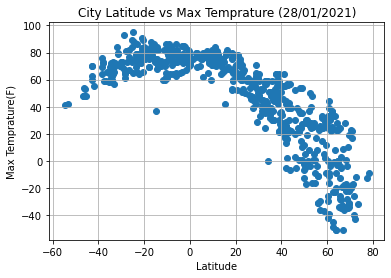

In [25]:
from datetime import date
today = date.today()

fig = plt.figure()
plt.grid()

plt.scatter(clean_city_df['Lat'],clean_city_df['Max Temp'])

plt.xlabel("Latitude")
plt.ylabel("Max Temprature(F)")
plt.title(f"City Latitude vs Max Temprature ({today.strftime('%d/%m/%Y')})")
plt.show()

fig.savefig("output_data\Lat_Temp.png")

# Analysis
# 
# 

## Latitude vs. Humidity Plot

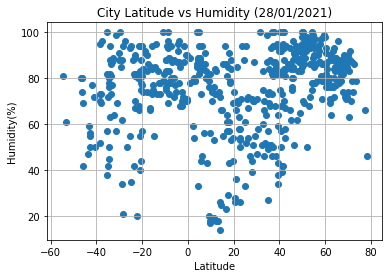

In [72]:
fig = plt.figure()
plt.grid()

plt.scatter(clean_city_df['Lat'],clean_city_df['Humidity'])
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title(f"City Latitude vs Humidity ({today.strftime('%d/%m/%Y')})")
plt.show()

fig.savefig("output_data\Lat_Humidity.png")

# Analysis
# 
# 

## Latitude vs. Cloudiness Plot

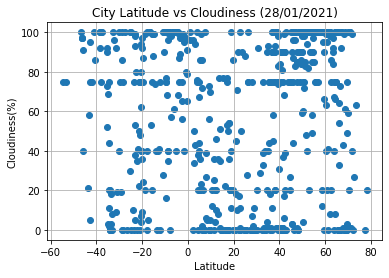

In [73]:
fig = plt.figure()
plt.grid()

plt.scatter(clean_city_df['Lat'],clean_city_df['Cloudiness'])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title(f"City Latitude vs Cloudiness ({today.strftime('%d/%m/%Y')})")
plt.show()

fig.savefig("output_data\Lat_Cloundiness.png")

# Analysis
# 
# 

## Latitude vs. Wind Speed Plot

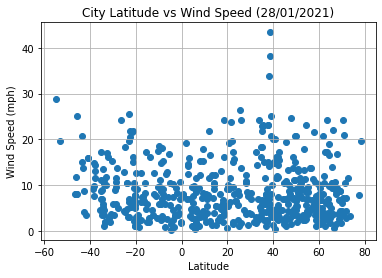

In [74]:
fig = plt.figure()
plt.grid()

plt.scatter(clean_city_df['Lat'],clean_city_df['Wind Speed'])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs Wind Speed ({today.strftime('%d/%m/%Y')})")
plt.show()

fig.savefig("output_data\Lat_WindSpeed.png")

# Analysis
# 
# 

## Linear Regression

In [75]:
clean_city_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,cabo san lucas,22.8909,-109.9124,75,53,1,8.05,MX,1611878592
1,hobart,-42.8794,147.3294,64,55,75,13.80,AU,1611878721
2,roald,62.5833,6.1333,33,64,75,17.27,NO,1611878940
3,cape town,-33.9258,18.4232,63,82,0,4.61,ZA,1611878888
4,avare,-23.0986,-48.9258,70,90,98,2.95,BR,1611878774
...,...,...,...,...,...,...,...,...,...
541,westport,41.1415,-73.3579,25,42,1,11.50,US,1611878893
542,mogadishu,2.0371,45.3438,76,79,0,19.26,SO,1611879060
543,boa vista,2.8197,-60.6733,81,54,34,12.41,BR,1611878837
544,kieta,-6.2167,155.6333,85,72,100,12.95,PG,1611879035


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [76]:
# %matplotlib notebook

from scipy.stats import linregress
import scipy.stats as st

# Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude)
northern_hemisphere_df = clean_city_df.loc[clean_city_df['Lat']>=0]
# northern_hemisphere_df

# Southern Hemisphere (less than 0 degrees latitude)
southern_hemisphere_df = clean_city_df.loc[clean_city_df['Lat']<0]
# southern_hemisphere_df

The correlation coefficient between Nothern Hemisphere City Latitude and Max Tempareture (r-Value) is -0.8629642006118938


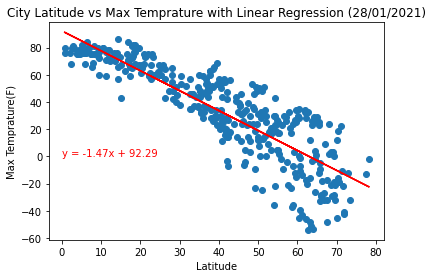

In [83]:
today = date.today()

fig = plt.figure(figsize=(6,4))
# plt.grid()

plt.scatter(northern_hemisphere_df['Lat'],northern_hemisphere_df['Max Temp'])

plt.xlabel("Latitude")
plt.ylabel("Max Temprature(F)")
plt.title(f"City Latitude vs Max Temprature with Linear Regression ({today.strftime('%d/%m/%Y')})")
# plt.show()
# plt.tight_layout()
print(f"The correlation coefficient between Nothern Hemisphere City Latitude and Max Tempareture (r-Value) is {st.pearsonr(northern_hemisphere_df['Lat'],northern_hemisphere_df['Max Temp'])[0]}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere_df['Lat'],northern_hemisphere_df['Max Temp'])
regress_values = northern_hemisphere_df['Lat'] * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(northern_hemisphere_df['Lat'],regress_values,"r-")
plt.annotate(line_eq,xy=(0,0),fontsize=10,color="red")
# plt.tight_layout()
plt.show()

# fig.savefig("output_data\Lat_Temp_Line_Regression.png")

# Analysis
# 
# 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient between Southern Hemisphere City Latitude and Max Tempareture (r-Value) is 0.6716049764124297


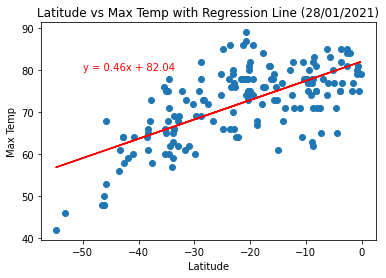

In [86]:
southern_hemisphere_df

plt.figure(figsize=(6,4))
plt.scatter(southern_hemisphere_df['Lat'], southern_hemisphere_df['Max Temp'])

plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title(f"Latitude vs Max Temp with Regression Line ({ time.strftime('%d/%m/%Y')})")

print(f"The correlation coefficient between Southern Hemisphere City Latitude and Max Tempareture (r-Value) is {st.pearsonr(southern_hemisphere_df['Lat'],southern_hemisphere_df['Max Temp'])[0]}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere_df['Lat'], southern_hemisphere_df['Max Temp'])
regress_values = southern_hemisphere_df['Lat'] * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(southern_hemisphere_df['Lat'],regress_values,"r-")
plt.annotate(line_eq,xy=(-50,80),fontsize=10,color="red")
plt.show()

# Analysis
# 
# 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient between Northern Hemisphere City Latitude and Humidity (r-Value) is 0.35082022172849003


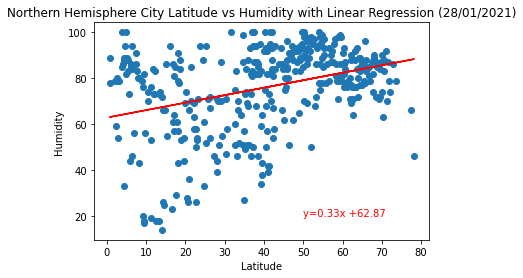

In [87]:
plt.figure(figsize=(6,4))

plt.scatter(northern_hemisphere_df['Lat'],northern_hemisphere_df['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(f"Northern Hemisphere City Latitude vs Humidity with Linear Regression ({time.strftime('%d/%m/%Y')})")

print(f"The correlation coefficient between Northern Hemisphere City Latitude and Humidity (r-Value) is {st.pearsonr(northern_hemisphere_df['Lat'],northern_hemisphere_df['Humidity'])[0]}")
(slope, intercept, r_value, p_value, stderr) = linregress(northern_hemisphere_df['Lat'],northern_hemisphere_df['Humidity'])
regress_value = northern_hemisphere_df['Lat'] * slope + intercept

line_eq = 'y=' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.plot(northern_hemisphere_df['Lat'],regress_value,'r-')
plt.annotate(line_eq,xy=(50,20),fontsize=10,color="red")
plt.show()

# Analysis
# 
# 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient between Southern Hemisphere City Latitude and Humidity (r-Value) is 0.30120323421683504


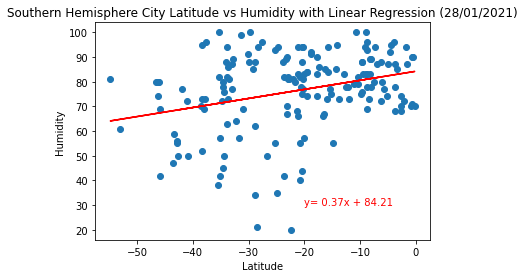

In [88]:
plt.figure(figsize=(6,4))
plt.scatter(southern_hemisphere_df['Lat'],southern_hemisphere_df['Humidity'])

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(f"Southern Hemisphere City Latitude vs Humidity with Linear Regression ({time.strftime('%d/%m/%Y')})")

print(f"The correlation coefficient between Southern Hemisphere City Latitude and Humidity (r-Value) is {st.pearsonr(southern_hemisphere_df['Lat'],southern_hemisphere_df['Humidity'])[0]}")
(slope, intercept, r_value, p_value, stderr) = linregress(southern_hemisphere_df['Lat'],southern_hemisphere_df['Humidity'])
regress_value = southern_hemisphere_df['Lat'] * slope + intercept

line_eq = f"y= {round(slope,2)}x + {round(intercept,2)}"

plt.plot(southern_hemisphere_df['Lat'], regress_value,'r-')
plt.annotate(line_eq,xy=(-20,30),fontsize=10,color="red")
plt.show()

# Analysis
# 
# 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient between Northern Hemisphere City Latitude and Humidity (r-Value) is 0.29672955122049516


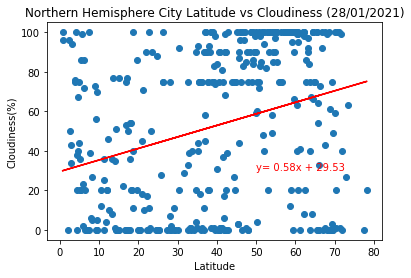

In [89]:
fig = plt.figure(figsize=(6,4))

plt.scatter(northern_hemisphere_df['Lat'],northern_hemisphere_df['Cloudiness'])

plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title(f"Northern Hemisphere City Latitude vs Cloudiness ({today.strftime('%d/%m/%Y')})")

print(f"The correlation coefficient between Northern Hemisphere City Latitude and Humidity (r-Value) is {st.pearsonr(northern_hemisphere_df['Lat'],northern_hemisphere_df['Cloudiness'])[0]}")
(slope, intercept, r_value, p_value, stderr) = linregress(northern_hemisphere_df['Lat'],northern_hemisphere_df['Cloudiness'])
regress_value = northern_hemisphere_df['Lat'] * slope + intercept

line_eq = f"y= {round(slope,2)}x + {round(intercept,2)}"

plt.plot(northern_hemisphere_df['Lat'], regress_value,'r-')
plt.annotate(line_eq,xy=(50,30),fontsize=10,color="red")
plt.show()

# Analysis
# 
# 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient between Southern Hemisphere City Latitude and Humidity (r-Value) is 0.14997135812647194


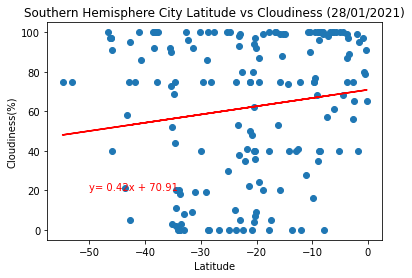

In [90]:
fig = plt.figure(figsize=(6,4))

plt.scatter(southern_hemisphere_df['Lat'],southern_hemisphere_df['Cloudiness'])

plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title(f"Southern Hemisphere City Latitude vs Cloudiness ({today.strftime('%d/%m/%Y')})")

print(f"The correlation coefficient between Southern Hemisphere City Latitude and Humidity (r-Value) is {st.pearsonr(southern_hemisphere_df['Lat'],southern_hemisphere_df['Cloudiness'])[0]}")
(slope, intercept, r_value, p_value, stderr) = linregress(southern_hemisphere_df['Lat'],southern_hemisphere_df['Cloudiness'])
regress_value = southern_hemisphere_df['Lat'] * slope + intercept

line_eq = f"y= {round(slope,2)}x + {round(intercept,2)}"

plt.plot(southern_hemisphere_df['Lat'], regress_value,'r-')
plt.annotate(line_eq,xy=(-50,20),fontsize=10,color="red")
plt.show()

# Analysis
# 
# 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient between Northern Hemisphere City Latitude and Wind Speed (r-Value) is 0.004318215982841843


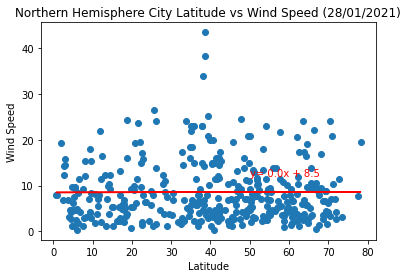

In [91]:
fig = plt.figure(figsize=(6,4))

plt.scatter(northern_hemisphere_df['Lat'],northern_hemisphere_df['Wind Speed'])

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title(f"Northern Hemisphere City Latitude vs Wind Speed ({today.strftime('%d/%m/%Y')})")

print(f"The correlation coefficient between Northern Hemisphere City Latitude and Wind Speed (r-Value) is {st.pearsonr(northern_hemisphere_df['Lat'],northern_hemisphere_df['Wind Speed'])[0]}")
(slope, intercept, r_value, p_value, stderr) = linregress(northern_hemisphere_df['Lat'],northern_hemisphere_df['Wind Speed'])
regress_value = northern_hemisphere_df['Lat'] * slope + intercept

line_eq = f"y= {round(slope,2)}x + {round(intercept,2)}"

plt.plot(northern_hemisphere_df['Lat'], regress_value,'r-')
plt.annotate(line_eq,xy=(50,12),fontsize=10,color="red")
plt.show()


# Analysis
# 
# 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient between Southern Hemisphere City Latitude and Wind Speed (r-Value) is -0.29393454882579384


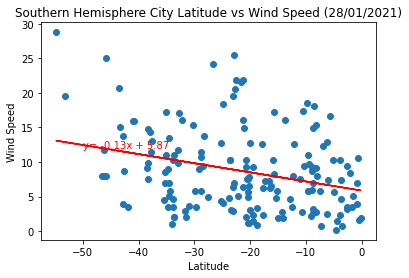

In [92]:
fig = plt.figure(figsize=(6,4))

plt.scatter(southern_hemisphere_df['Lat'],southern_hemisphere_df['Wind Speed'])

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title(f"Southern Hemisphere City Latitude vs Wind Speed ({today.strftime('%d/%m/%Y')})")

print(f"The correlation coefficient between Southern Hemisphere City Latitude and Wind Speed (r-Value) is {st.pearsonr(southern_hemisphere_df['Lat'],southern_hemisphere_df['Wind Speed'])[0]}")
(slope, intercept, r_value, p_value, stderr) = linregress(southern_hemisphere_df['Lat'],southern_hemisphere_df['Wind Speed'])
regress_value = southern_hemisphere_df['Lat'] * slope + intercept

line_eq = f"y= {round(slope,2)}x + {round(intercept,2)}"

plt.plot(southern_hemisphere_df['Lat'], regress_value,'r-')
plt.annotate(line_eq,xy=(-50,12),fontsize=10,color="red")
plt.show()


# Analysis
# 
# 